1- Chargement de dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MedHouseVal'] = dataset.target


2- Nettoyage et prétraitement

In [ ]:
print(df.isnull().sum())  # Vérification des valeurs manquantes
print(df.dtypes)          # Vérification des types de données
print(df.describe())      # Affichage des statistiques descriptives

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.09952

3- EDA

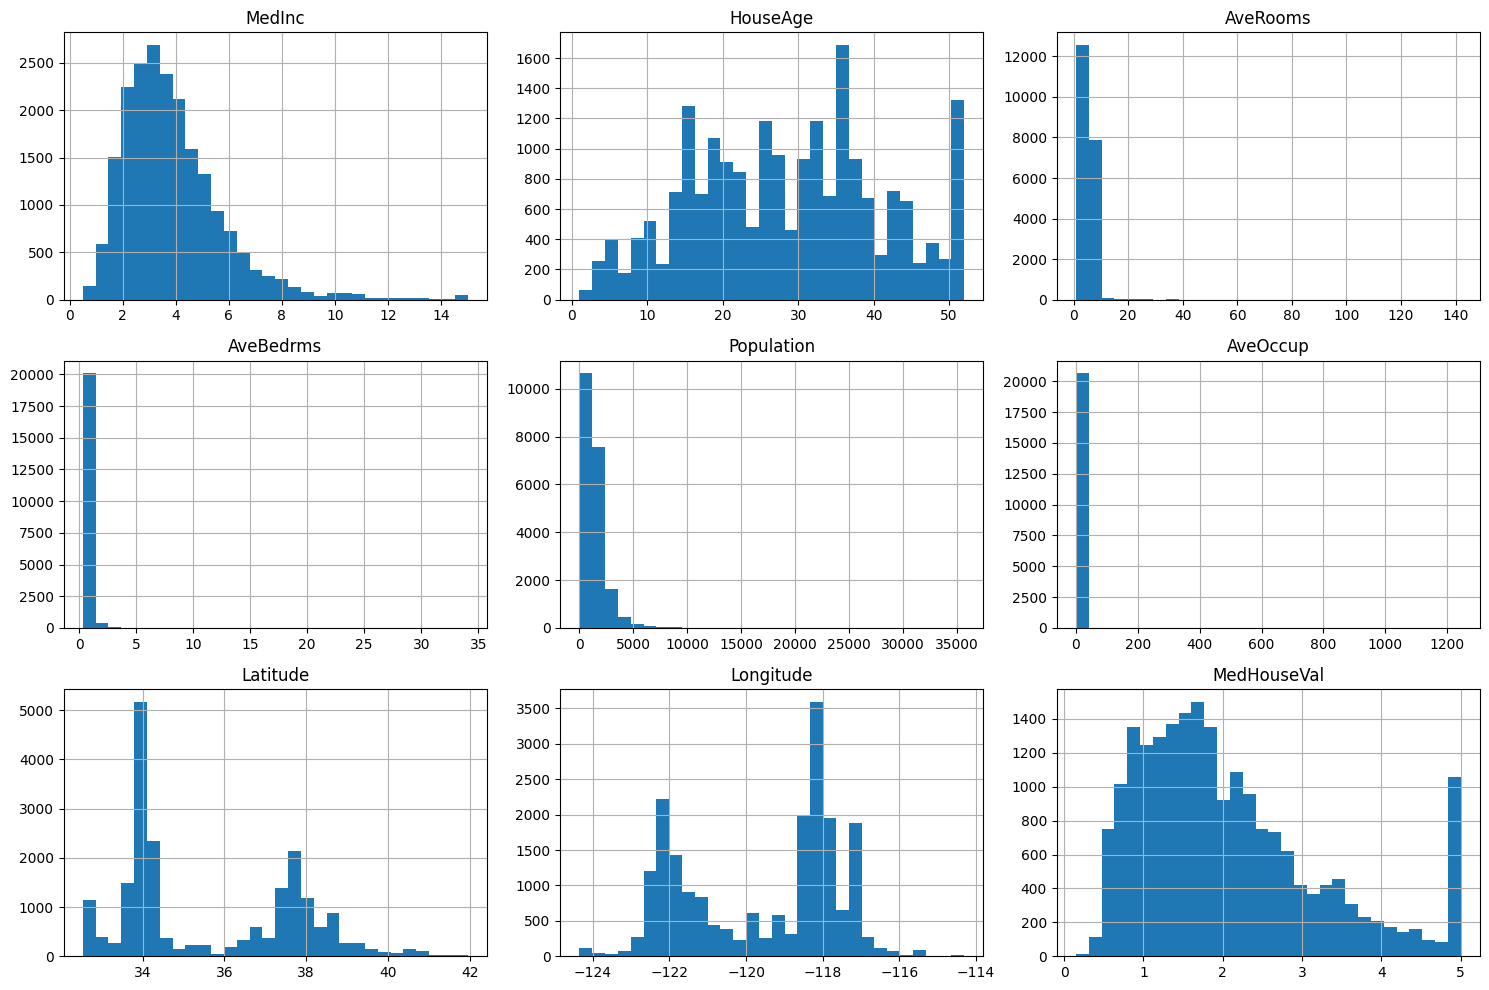

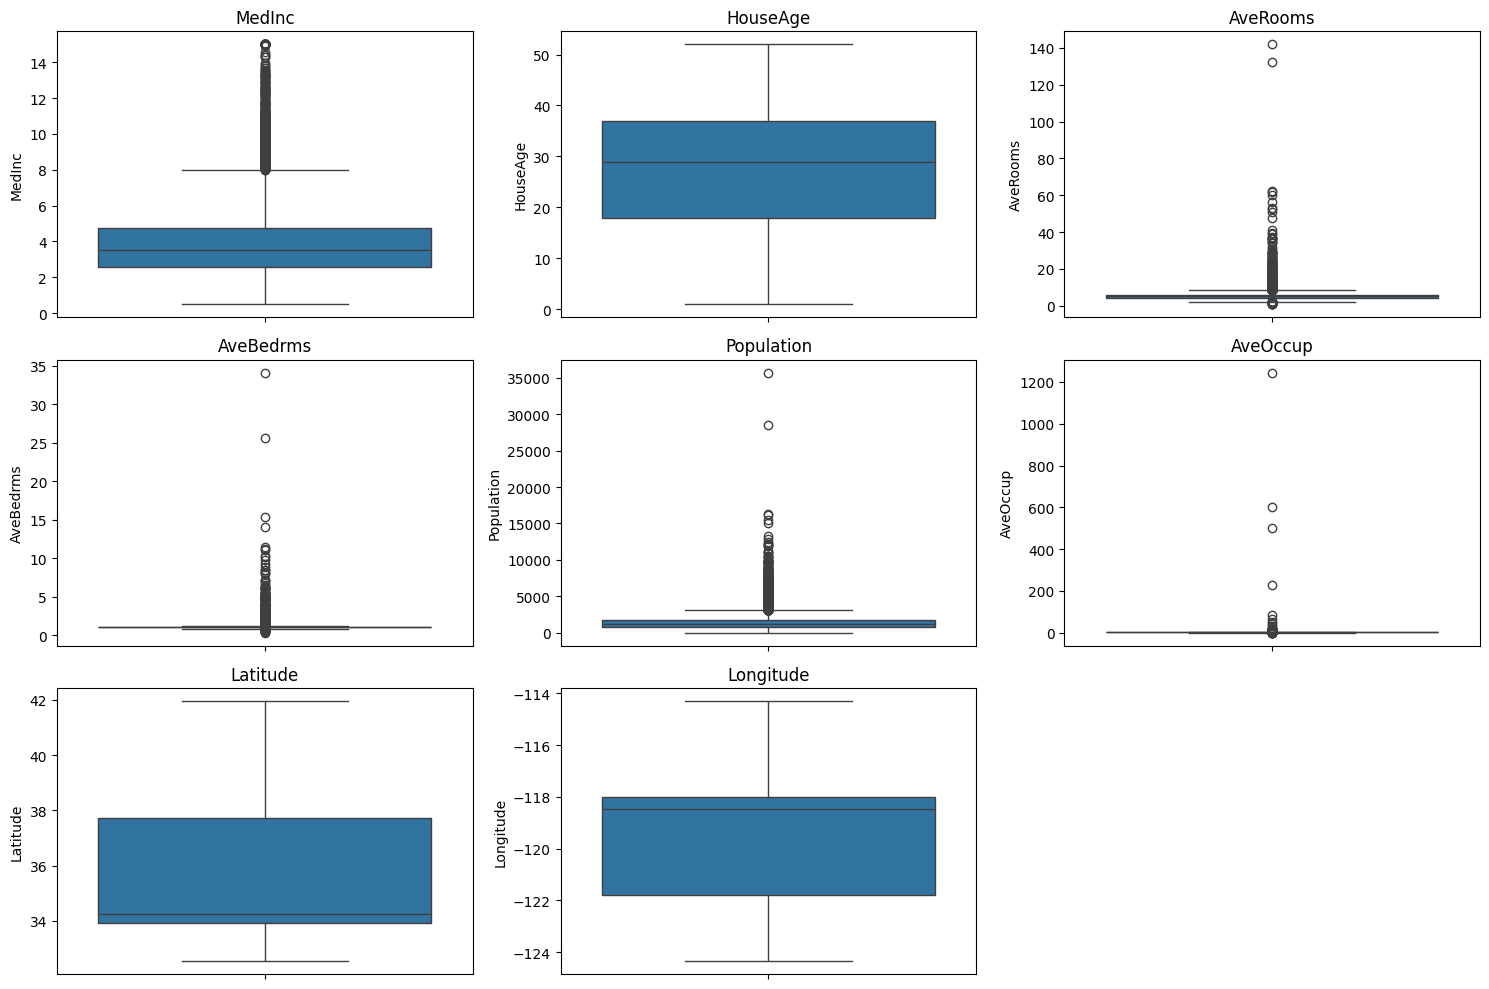

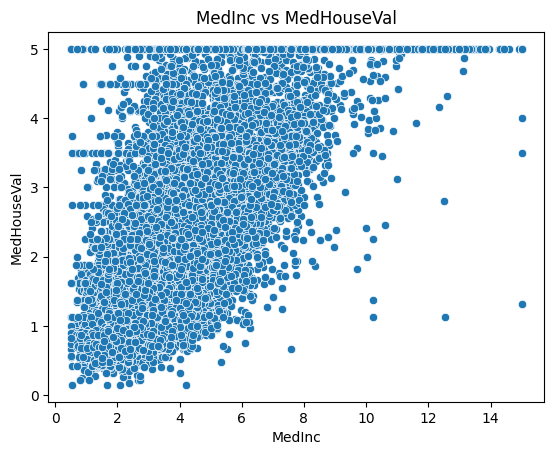

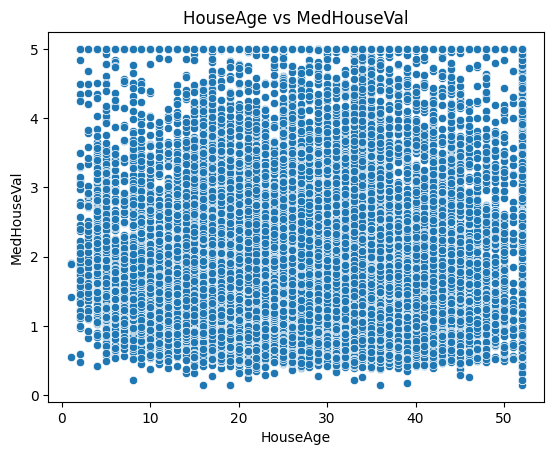

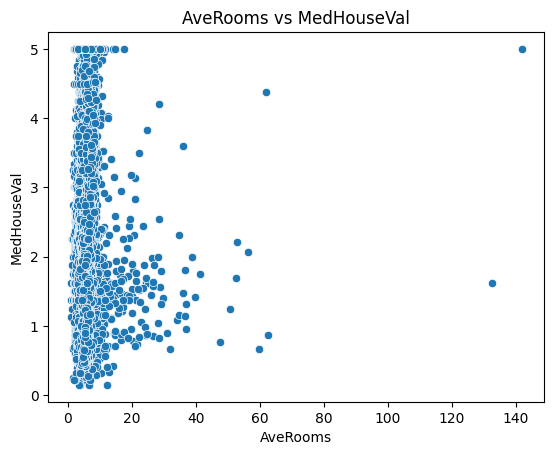

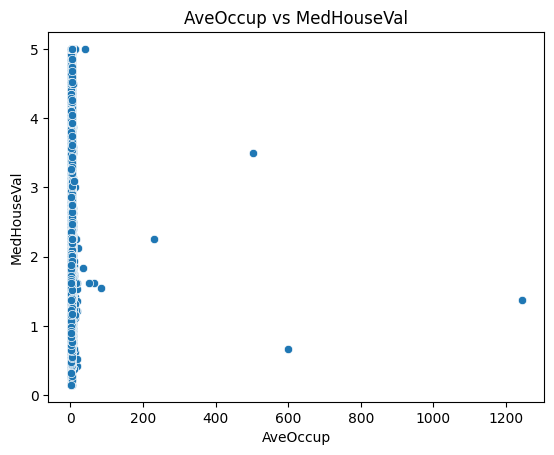

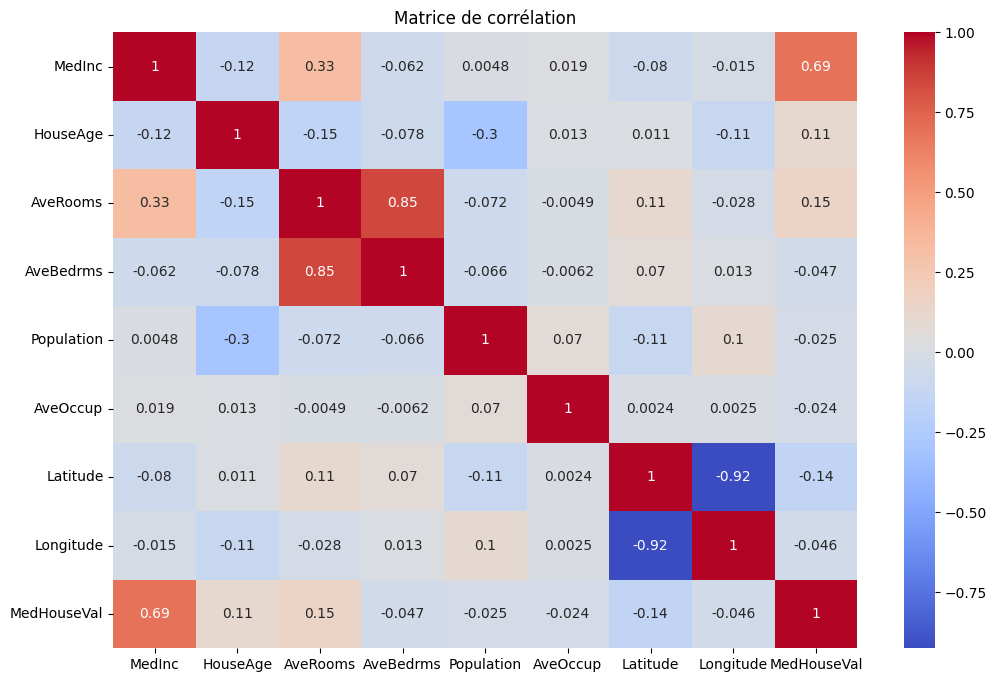

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogrammes

df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplots

plt.figure(figsize=(15,10))
for i, colonne in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[colonne])
    plt.title(colonne)
plt.tight_layout()
plt.show()

# Scatterplots (prix) vs MedHouseVal (variable clés)

scatter_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
for colonne_scatter in scatter_features:
    sns.scatterplot(x=df[colonne_scatter], y=df['MedHouseVal'])
    plt.title(f"{colonne_scatter} vs MedHouseVal")
    plt.show()

# Matrice de corrélation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

4- Split train/validation/test

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques (X) de la variable cible (y)

X = df.drop("MedHouseVal", axis=1) # X contient toutes les colonnes sauf 'MedHouseVal'
y = df["MedHouseVal"]             # y contient uniquement la colonne 'MedHouseVal'

# Division des données en ensembles d'entraînement complet (pour l'entraînement), de test et de validation

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

5- Feature engineering/sélection

In [ ]:
# Normalisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

6- Baseline et modélisation initiale

In [ ]:
# Régression linéaire

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_val_prediction = lr.predict(X_val_scaled)

print("Régression Linéaire (validation set)")
print(f"\u2192 MSE: {mean_squared_error(y_val, y_val_prediction):.4f}")
print(f"\u2192 MAE: {mean_absolute_error(y_val, y_val_prediction):.4f}")
print(f"\u2192 R²: {r2_score(y_val, y_val_prediction):.4f}")

Régression Linéaire (validation set)
→ MSE: 0.5297
→ MAE: 0.5333
→ R²: 0.6142


7- Régularisation

In [ ]:
# Ridge : pénalisation L2 pour la multicolinéarité et Lasso : pénalisation L1 pour la sélection de features

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Entraînement du modèle Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_val_ridge = ridge.predict(X_val_scaled)

# Entraînement du modèle Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_val_lasso = lasso.predict(X_val_scaled)

# Affichage des métriques d'évaluation pour Ridge

print("\nRidge Regression (validation set)")
print(f"\u2192 MSE: {mean_squared_error(y_val, y_val_ridge):.4f}")
print(f"\u2192 MAE: {mean_absolute_error(y_val, y_val_ridge):.4f}")
print(f"\u2192 R²: {r2_score(y_val, y_val_ridge):.4f}")

# Affichage des métriques d'évaluation pour Lasso

print("\nLasso Regression (validation set)")
print(f"\u2192 MSE: {mean_squared_error(y_val, y_val_lasso):.4f}")
print(f"\u2192 MAE: {mean_absolute_error(y_val, y_val_lasso):.4f}")
print(f"\u2192 R²: {r2_score(y_val, y_val_lasso):.4f}")


Ridge Regression (validation set)
→ MSE: 0.5297
→ MAE: 0.5333
→ R²: 0.6142

Lasso Regression (validation set)
→ MSE: 0.6825
→ MAE: 0.6257
→ R²: 0.5029


8- Evaluation finale

In [ ]:
best_choosen_model = ridge  # à ajuster selon les résultats

y_test_pred = best_choosen_model.predict(X_test_scaled)

# Intervalle de confiance via bootstrap

errors = y_test - y_test_pred
conf_interval = np.percentile(errors, [2.5, 97.5])

print("\nÉvaluation finale (test set)")
print(f"\u2192 MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"\u2192 MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"\u2192 R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"\u2192 Intervalle de confiance à 95% sur l'erreur: {conf_interval}")


Évaluation finale (test set)
→ MSE: 0.5617
→ MAE: 0.5333
→ R²: 0.5713
→ Intervalle de confiance à 95% sur l'erreur: [-1.03427241  1.92632038]


9- Conclusion

In [ ]:
print("\n[Conclusions]")
print ("Importance des variables")
print ("MedInc (Revenu médian) : Variable la plus déterminante, avec un impact fortement positif. Une augmentation du revenu médian dans une zone entraîne une hausse significative des prix de l'immobilier.")
print ("HouseAge (Âge médian des maisons) : Influence modérée. Les maisons plus anciennes peuvent avoir une valeur inférieure, sauf dans les zones historiques/rénovées.")
print ("AveRooms (Nombre moyen de pièces) : Effet positif. Un plus grand nombre de pièces augmente généralement la valeur du logement.")
print ("AveBedrms (Nombre moyen de chambres) : Impact négatif ou neutre, souvent corrélé à AveRooms. Une proportion élevée de chambres par rapport aux pièces totales peut indiquer des logements moins spacieux.")
print("Population (Densité de population) : Effet faible ou négatif. Une forte densité peut réduire les prix (nuisances, demande locale).")

print ("\n Pistes d'amélioration")
print ("Utiliser des modèles avancés comme RandomForest ou XGBoost ou les Réseaux de neurones")
print ("Ajouter des données externes : géolocalisation, distance des écoles/transports")
print("Appliquer une validation croisée (KFold)")
print ("Nettoyer les valeurs extrêmes (outliers)")
print ("\n Affiner la sélection des variables (Lasso, SHAP, RFE)")



[Conclusions]
Importance des variables
MedInc (Revenu médian) : Variable la plus déterminante, avec un impact fortement positif. Une augmentation du revenu médian dans une zone entraîne une hausse significative des prix de l'immobilier.
HouseAge (Âge médian des maisons) : Influence modérée. Les maisons plus anciennes peuvent avoir une valeur inférieure, sauf dans les zones historiques/rénovées.
AveRooms (Nombre moyen de pièces) : Effet positif. Un plus grand nombre de pièces augmente généralement la valeur du logement.
AveBedrms (Nombre moyen de chambres) : Impact négatif ou neutre, souvent corrélé à AveRooms. Une proportion élevée de chambres par rapport aux pièces totales peut indiquer des logements moins spacieux.
Population (Densité de population) : Effet faible ou négatif. Une forte densité peut réduire les prix (nuisances, demande locale).

 Pistes d'amélioration
Utiliser des modèles avancés comme RandomForest ou XGBoost ou les Réseaux de neurones
Ajouter des données externes : 